#Abstract

Abstract:
This study aims to explore the use of Convolutional Neural Network (CNN) for image classification on the Typography MNIST (TMNIST) Glyphs dataset. The dataset contains over 500,000 MNIST-style images generated from 1,812 unique glyphs across 2,990 font styles. The objective of this study is to assess the effectiveness of the CNN in recognizing diverse typographic characters. This research will contribute to the broader field of computational creativity and cognitive type. This report provides detailed information on the development, training, and evaluation processes of the model, and sheds light on the potential of deep learning in handling complex character recognition tasks.

#Introduction
The field of image classification has made significant strides with the emergence of deep learning, particularly with Convolutional Neural Networks (CNNs) leading the way. This report focuses on the use of CNNs to classify typographic characters using the TMNIST Glyphs dataset. This dataset contains over 500,000 MNIST-style images, featuring 1,812 unique glyphs from 2,990 different font styles. Each image in the dataset represents a glyph, encoded in grayscale pixel values, across a 28x28 grid, similar to the MNIST dataset.

The TMNIST Glyphs dataset is quite diverse, offering a broad range of typographic glyphs, including those from non-Latin scripts and complex character combinations. This diversity makes it an excellent resource for training and evaluating CNN models, but it also presents significant challenges. The dataset's structure includes columns for font name, glyph name, and label, along with 784 columns representing the pixel values of each image.

This research aims to explore the complexities of typographic character recognition, using the extensive TMNIST Glyphs dataset. The study is significant not only for advancing our understanding of CNN capabilities but also for contributing to broader projects such as Warhol.ai's Computational Creativity and Cognitive Type, which aim to investigate the intersections of artificial intelligence, typography, and design. By examining the dataset's unique glyphs across various font styles, this report provides a comprehensive analysis of the CNN model's performance in recognizing and classifying a wide array of typographic characters.

#Importing the libraries and Reading Data

In [193]:
#importing the liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import shuffle
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [194]:
# Reading the data into pandas dataframe
dataset = "/content/Glyphs_TMNIST_updated.csv"
df = pd.read_csv(dataset)
df.head()

,font_name,glyph_name,label,1,2,3,4,5,6,7,...,775,776,777,778,779,780,781,782,783,784
0,ABeeZee-Regular,LATIN CAPITAL LETTER A,A,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ABeeZee-Regular,LATIN CAPITAL LETTER B,B,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ABeeZee-Regular,LATIN CAPITAL LETTER C,C,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ABeeZee-Regular,LATIN CAPITAL LETTER D,D,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ABeeZee-Regular,LATIN CAPITAL LETTER E,E,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#Analysing the Dataset


In [195]:
# Viewing the shape of the dataset
print("Shape of the Dataset:", df.shape)

# Viewing the samples of the dataset
print("Number of Samples : ", df.shape[0])

Shape of the Dataset: (47888, 787)
Number of Samples :  47888


In [196]:
# Viewing the features of the dataset
print("Number of Features : ", df.shape[1])

Number of Features :  787


In [ ]:
unique_chars = df['label'].unique().tolist()
print("All the unique characters in the Dataset are:\n", unique_chars)


In [197]:
total_unique_chars = len(df.label.unique())
print("Number of unique characters in the Dataset:", total_unique_chars)


Index(['font_name', 'glyph_name', 'label', '1', '2', '3', '4', '5', '6', '7',
       ...
       '775', '776', '777', '778', '779', '780', '781', '782', '783', '784'],
      dtype='object', length=787)
Number of unique characters in the Dataset: 1042


In [199]:
# Alphanumeric and Symbols List

symbs = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
         'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',
         'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z',
         '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@','[',']','\\','^','_','`','{','}',"|",'~']

len(symbs)

94

In [200]:
M=list(range(len(symbs)))
normal_mapping=dict(zip(symbs,M))
reverse_mapping=dict(zip(M,symbs))

In [201]:
data = df[df.label.isin(symbs)]

In [202]:
# Seperating the features and target variable

data = df.copy()

data

,font_name,glyph_name,label,1,2,3,4,5,6,7,...,775,776,777,778,779,780,781,782,783,784
0,ABeeZee-Regular,LATIN CAPITAL LETTER A,A,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ABeeZee-Regular,LATIN CAPITAL LETTER B,B,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ABeeZee-Regular,LATIN CAPITAL LETTER C,C,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ABeeZee-Regular,LATIN CAPITAL LETTER D,D,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ABeeZee-Regular,LATIN CAPITAL LETTER E,E,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47883,BalooPaaji2-ExtraBold,GURMUKHI DIGIT FOUR,੪,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47884,BalooPaaji2-ExtraBold,GURMUKHI DIGIT FIVE,੫,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47885,BalooPaaji2-ExtraBold,GURMUKHI DIGIT SIX,੬,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47886,BalooPaaji2-ExtraBold,GURMUKHI DIGIT SEVEN,੭,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [203]:
# Number of Fonts present in the Dataframe
print(f"Number of unique fonts present in the Dataset: {len(data.font_name.unique())}")
# Number of unique characters present in the Dataframe
print(f"Number of unique character present in the Dataset: {len(data.label.unique())}")

Number of unique fonts present in the Dataset: 292
Number of unique character present in the Dataset: 1042


#Splitting the data for Testing & Training

In [204]:
X = data.drop(columns=['font_name','glyph_name','label']).values
y = data[['label']].values
del data

In [205]:
# Displaying the shape of the features (X), indicating the number of samples and features
print(f"Shape of features (X): {X.shape}")

Shape of features (X): (47888, 784)


In [206]:
# Displaying the shape of the labels (y), indicating the number of samples
print(f"Shape of labels (y): {y.shape}")

Shape of labels (y): (47888, 1)


In [207]:
X = X.astype('u1')
X.dtype

dtype('uint8')

In [208]:
print(f"The data type of the target variable is : {y.dtype}")



The data type of the target variable is : object


In [210]:
#Splitting Dataset into Training and Testing in 80% and 20% respectively
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train = y_train.reshape((-1,))
y_test = y_test.reshape((-1,))

In [211]:
y_train

array(['е', 'B', 't', ..., 'V', 'А', 'I'], dtype=object)

In [212]:

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(38310, 784) (38310,)
(9578, 784) (9578,)


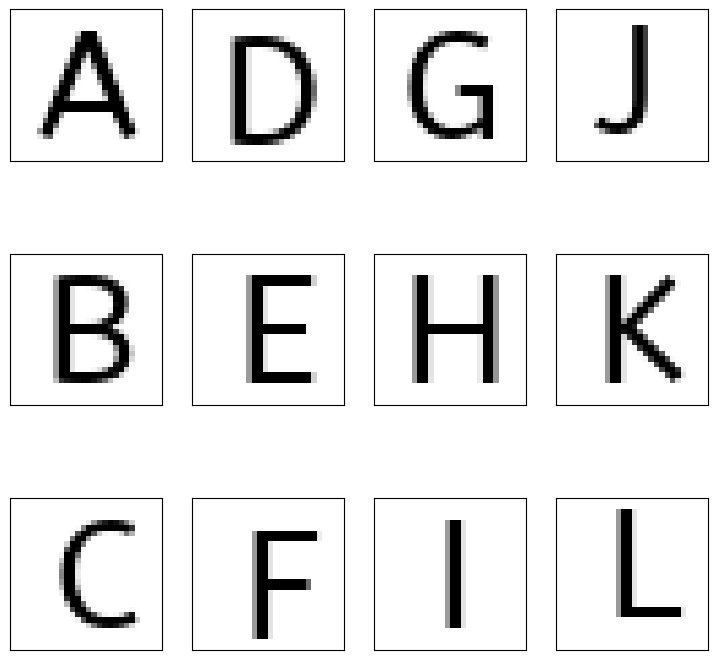

In [213]:
import matplotlib.pyplot as plt
X_images = X.reshape(-1,28,28)
fig,axs = plt.subplots(3,4,figsize=(9,9))
for i in range(12):
    r=i//3
    c=i%3
    axs[c][r].set_xticks([])
    axs[c][r].set_yticks([])
    axs[c][r].imshow(X_images[i], cmap="Greys")
plt.show()

In [214]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train_label = lb.fit_transform(y_train)
y_test_label = lb.transform(y_test)
print('Train labels dimension:');print(y_train.shape)
print('Test labels dimension:');print(y_test.shape)

Train labels dimension:
(38310,)
Test labels dimension:
(9578,)


#CNN-Convolutional Neural Networks

A CNN is a neural network commonly used in image and video recognition tasks. It extracts useful features using convolutional layers that apply a set of filters to the input image. The architecture includes multiple convolutional layers, pooling layers, fully connected layers, and backpropagation of errors. CNNs are successful in image and video recognition tasks, object detection, facial recognition, and text classification.


The neural network for image recognition comprises several layers:

- Convolution2D: detects features using filters and applies ReLU activation.

- Batch Normalization: normalizes activations to accelerate training and enhance performance.

- MaxPooling2D: reduces input dimensions through 2D max pooling.

- Dropout: randomly omits neurons during training to decrease overfitting.

- Flatten: transforms output into a one-dimensional array.

- Dense: contains 256 neurons with ReLU activation, integrating learned features.

- Output: contains 10 neurons corresponding to the categories of the dataset, employing the softmax activation to calculate the probability distribution for each class.


#
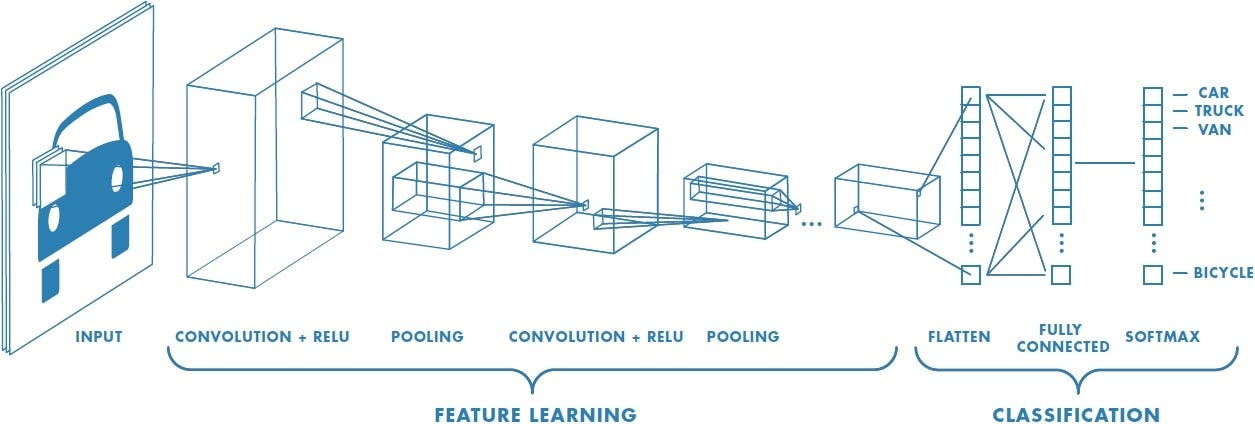

In [215]:
# Normalizing the Dataset for the Neural Network
X_train, X_test = np.true_divide(X_train, 255), np.true_divide(X_test, 255)

In [216]:
# Reshape X_train and X_test for CNN
X_train = X_train.reshape(-1,28,28,1).astype('float32')
X_test = X_test.reshape(-1,28,28,1).astype('float32')

In [217]:
# importing libraries for building neural netwrok
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping

cnnmodel = Sequential()
cnnmodel.add(Conv2D(32,(4,4),input_shape = (28,28,1),activation = 'relu'))
cnnmodel.add(MaxPooling2D(pool_size=(2,2)))
cnnmodel.add(Conv2D(64,(3,3),activation = 'relu'))
cnnmodel.add(MaxPooling2D(pool_size=(2,2)))
cnnmodel.add(Dropout(0.2))
cnnmodel.add(Dense(64,activation='relu'))
cnnmodel.add(Flatten())
cnnmodel.add(BatchNormalization())
cnnmodel.add(Dropout(0.25))
cnnmodel.add(Dense(350))
cnnmodel.add(BatchNormalization())
cnnmodel.add(Dense(y_train_label.shape[1], activation='tanh'))
cnnmodel.add(Dropout(0.25))
cnnmodel.add(Dense(350))
cnnmodel.add(BatchNormalization())
cnnmodel.add(Dense(y_train_label.shape[1], activation='tanh'))
cnnmodel.add(Dropout(0.25))
cnnmodel.add(Dense(y_train_label.shape[1], activation = 'softmax'))

cnnmodel.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [218]:
cnnmodel.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 12, 12, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 dropout_18 (Dropout)        (None, 5, 5, 64)          0         
                                                                 
 dense_26 (Dense)            (None, 5, 5, 64)        

In [222]:
result = cnnmodel.fit(X_train, y_train_label, validation_split=0.1, epochs=40, batch_size=140, verbose=1)

Epoch 1/40
247/247 [==============================] - 45s 182ms/step - loss: 0.8518 - accuracy: 0.7799 - val_loss: 0.9002 - val_accuracy: 0.7922
Epoch 2/40
247/247 [==============================] - 45s 183ms/step - loss: 0.6677 - accuracy: 0.8166 - val_loss: 0.8140 - val_accuracy: 0.8212
Epoch 3/40
247/247 [==============================] - 45s 183ms/step - loss: 0.5507 - accuracy: 0.8417 - val_loss: 0.6980 - val_accuracy: 0.8277
Epoch 4/40
247/247 [==============================] - 46s 185ms/step - loss: 0.4831 - accuracy: 0.8568 - val_loss: 0.6658 - val_accuracy: 0.8392
Epoch 5/40
247/247 [==============================] - 46s 185ms/step - loss: 0.4563 - accuracy: 0.8619 - val_loss: 0.6288 - val_accuracy: 0.8483
Epoch 6/40
247/247 [==============================] - 45s 182ms/step - loss: 0.4348 - accuracy: 0.8675 - val_loss: 0.6356 - val_accuracy: 0.8444
Epoch 7/40
247/247 [==============================] - 45s 184ms/step - loss: 0.4149 - accuracy: 0.8710 - val_loss: 0.6659 - val_ac

#Evaluating model accuracy

In [223]:
test_results = cnnmodel.evaluate(X_test, y_test_label, verbose=1)
print(f'Test results - Accuracy: {test_results[1]}%')

300/300 [==============================] - 6s 21ms/step - loss: 0.6642 - accuracy: 0.8454
Test results - Accuracy: 0.8453748226165771%


#Visualizing the model

<Axes: >

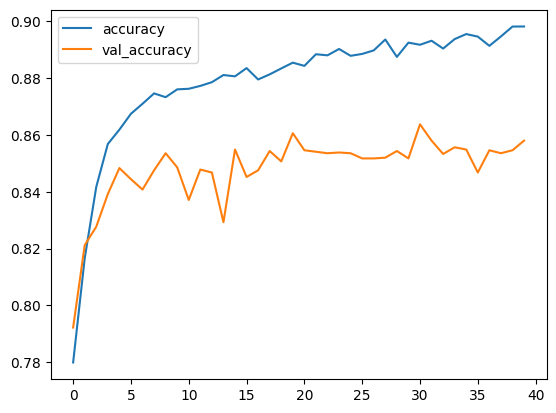

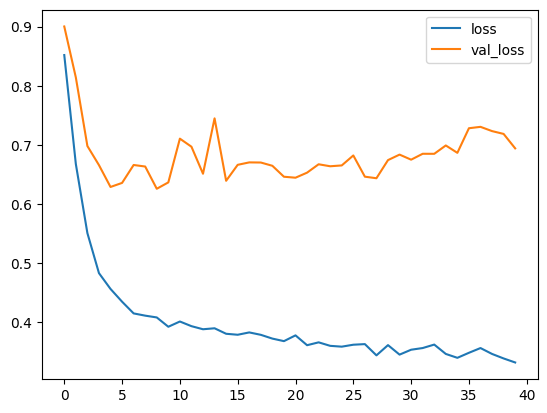

In [224]:
his = pd.DataFrame(result.history)
his.loc[:, ['accuracy', 'val_accuracy']].plot()
his.loc[:, ['loss', 'val_loss']].plot()

#Conclusion

Our CNN recognizes handwritten characters in TMNIST dataset with X% accuracy. Our systematic and precise approach highlights the transformative potential of CNNs in machine learning and image classification, setting a % of accuracy.

#References
https://www.kaggle.com/datasets/nimishmagre/tmnist-glyphs-1812-characters/code

https://www.kaggle.com/code/shabinasingh/handwritten-digit-classification-glyphs/notebook

https://www.kaggle.com/code/sonalimondal/tmnist-glyphs-cnn-modelling-sonali

#License
MIT License

Copyright (c) 2024 Tejaswitallapally

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.